# Datacamp Courses - Portfolio Risk Management

### Import Packages

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import skew, kurtosis, shapiro, norm
import seaborn as sns
import statsmodels.formula.api as smf

### Univariate Analysis

In [3]:
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/0f1a004a8aa693163fa55f277513309f710b700d/MSFTPrices.csv'
StockPrices = pd.read_csv(url)
StockPrices.head(5)

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


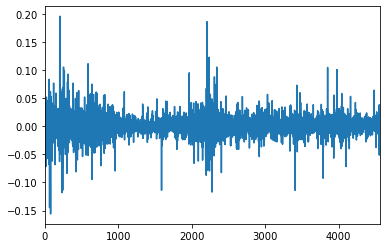

Mean Return Annualized: 9.985839482858783
Std Return Annualized: 0.3070304505826315
Skewness: 0.21935459193067852
Kurtosis: 13.31457261802553
Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0) -> data is non-normal


In [9]:
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
StockPrices['Returns'].plot()
plt.show()

# Mean annual return (252 traiding day)
mean_return_annualized = ((1+np.mean(StockPrices.Returns))**252)-1
print('Mean Return Annualized:',mean_return_annualized*100)

# Std annual return
std_return_annualized = np.std(StockPrices.Returns) * np.sqrt(252)
print('Std Return Annualized:', std_return_annualized)

# Skewness and Kurtosis and Forth Moment
returns_skewness = skew(StockPrices.Returns.dropna())
print('Skewness:', returns_skewness)
excess_kurtosis = kurtosis(StockPrices.Returns.dropna())
fourth_moment = excess_kurtosis + 3
print('Kurtosis:',fourth_moment)

# Shapiro-Wilk Test
shapiro_results = shapiro(StockPrices.Returns.dropna())
print("Shapiro results:", shapiro_results, '-> data is non-normal')

# Portfolio Analysis

In [44]:
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv'
StockReturns = pd.read_csv(url)
StockReturns.head(5)

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


### Portfolio Returns

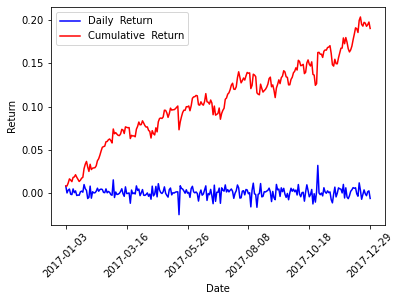

In [45]:
# Define weights, calculate weighted stock returns and aggregate returns
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
WeightedReturns = StockReturns.iloc[:,1:].mul(portfolio_weights, axis=1)
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
daily_plot, = plt.plot(StockReturns.Date, StockReturns.Portfolio, color = 'b')
cumulative_plot, = plt.plot(StockReturns.Date, CumulativeReturns, color = 'r')
plt.xticks(np.arange(0, 251, step=50), rotation = 45)
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend([daily_plot, cumulative_plot], ['Daily  Return','Cumulative  Return'])
plt.show()

### The weights could be uniformly spread or 'market-cap' weighted
# portfolio_weights = np.repeat(1/len(portfolio_weights), portfolio_weights)
# market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])
# portfolio_weights = market_capitalizations/np.sum(market_capitalizations)

### Covariances and Portfolio Standard Deviation

$ \sigma_\text{portfolio} = \sqrt{ w_T \cdot \Sigma \cdot w}$ 

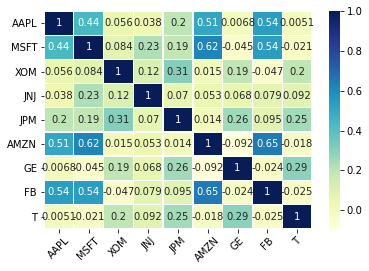

Portfolio Volatility 0.08931417642713807


In [56]:
stocks = StockReturns.iloc[:,1:-1]
sns.heatmap(stocks.corr(), annot = True, cmap="YlGnBu", linewidths = 0.3)
plt.xticks(rotation = 45)
plt.show()

# Annual covariance (252 trading days) and Portfolio std
cov_mat_annual = stocks.cov()*252
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print('Portfolio Volatility', portfolio_volatility)

### Sharp Ratio

A measure of risk-adjusted return $S = \frac{R_a - r_f}{\sigma_a}$ where:
- $R_a$: asset return
- $r_f$: risk-free rate of return (often 0)
- $\sigma_a$: asset volatility

On **Markowitze Portfolio** there is an efficient frontier of portfolios and there are two points:
- **GMV**: global minimum volatility; safest choice with minimum volatility
- **MSR**: max sharp ratio; highest reward with maximum expected return

In [73]:
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv'
RandomPortfolios = pd.read_csv(url)
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv'
StockReturns = pd.read_csv(url)
RandomPortfolios.head(3)

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185


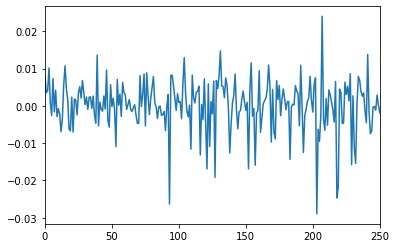

In [75]:
RandomPortfolios['Sharpe'] = RandomPortfolios.Returns / RandomPortfolios.Volatility

# Example of using the GMV-weights:
GMV_weights_array = np.array(RandomPortfolios.iloc[RandomPortfolios.Sharpe.idxmin(),:-3])
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 1:].mul(GMV_weights_array, axis=1).sum(axis=1)
StockReturns.Portfolio_GMV.plot()
plt.show()

## Capital Asset Pricing Model (CAPM)

"A fundamental building block for many ass pricing models and factor models in finance"

**CAPM**: $E(R_P) - RF = \beta_P \left(E(R_M) - RF \right)$ 

where $\beta$ is the portfolio exposure to market movements

We can calculate $\beta$ from the portfolio P and the benchmarket portfolio: $\beta = \frac{Cov(R_P, R_B)}{Var(R_B)}$ (a univariate approach in some sense)

Or via linear regression, using the CAPM formula: $ \mathbf{y} = \mathbf{x} \mathbf{\beta} + \mathbf{\epsilon}$. We do using the **statsmodel** package

**Fama-French 3 Factor model in Python**

$E(R_P) - RF = \beta_P \left(E(R_M) - RF \right) + b_{SMB} SMB + b_{HML} HML + \alpha$ 
- $SMB$: small minus big factor - indicates return of small-cap stocks vs return of large-cap stocks
- $HML$: high minus low - indicates growth of stocks w.r.t to their values
- $\alpha$: intercept - unaccounted factors

Some models even add *profitability* and *investment* to improve model's accuracy. The whole point of innovation in quant finance is to come up with new economic metrics of this kind.

In [80]:
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv'
FamaFrenchData = pd.read_csv(url)
FamaFrenchData.head(3)

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0


In [99]:
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData.Portfolio - FamaFrenchData.RF

#covariance_matrix = FamaFrenchData[['Portfolio_Excess','Market_Excess']].cov()
#benchmark_variance = FamaFrenchData['Market_Excess'].var()

CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)
CAPM_fit = CAPM_model.fit()
print('The adjusted R-Squared:', CAPM_fit.rsquared_adj)
print('The beta value(s) and their respective p-values:')
print(pd.concat([CAPM_fit.params, CAPM_fit.pvalues ], axis = 1))

The adjusted R-Squared: 0.8193910088585149
The beta value(s) and their respective p-values:
                      0             1
Intercept      0.000183  6.904127e-02
Market_Excess  1.015498  0.000000e+00
SMB           -0.262152  1.520051e-33
HML           -0.108657  4.699308e-07


## Random Walks and Monte Carlo Simulations

VaR helps answer what is the worst case scenario. It depends on 3 things:
- the time period,
- the confidence interval (the larger interval, the more likely the encounter with a big loss),
- and the loss percentage.

For example, VaR(95) is the 5th percentile of returns' value. Since returns are often centered around 0, VaR(95) would indicate one of the extreme worst scenario and assume that 95% of outcomes are above that scenario.

Monte Carlo Simulation = repeated random walks.

In [106]:
url = 'https://assets.datacamp.com/production/repositories/1546/datasets/dfe9da08c986709d59943d1d5c0106537a8c608a/USO.csv'
StockReturns = pd.read_csv(url)
StockReturns.head(3)

,Date,USO
0,2007-01-03,-0.042636
1,2007-01-04,-0.040688
2,2007-01-05,0.009285


**Returns based off 1 Random Walk**

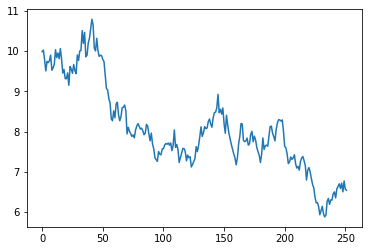

In [120]:
# Set the simulation parameters: mean, std, time and initial price
mu, vol, T, S0 = np.mean(StockReturns), np.std(StockReturns), 252, 10

# Generate random profits through the whole year and use it to forecast value of stock using RW
rand_profits = np.random.normal(mu, vol, T) + 1
forecasted_values = S0*rand_profits.cumprod()

plt.plot(range(0, T), forecasted_values)
plt.show()

**Returns based off 100 Random Walks - Monte Carlo**

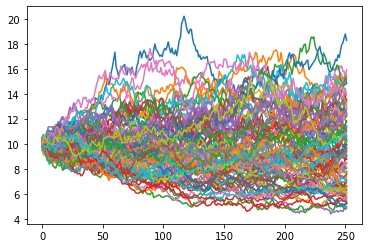

Parametric VaR(99):  -5.17 %


In [168]:
mu, vol, T, S0 = np.mean(StockReturns), np.std(StockReturns), 252, 10

sim_returns = []

for i in range(0, 100):
    rand_rets = np.random.normal(mu, vol, T)
    sim_returns.append(rand_rets)
    rand_profits = rand_rets + 1
    forecasted_values = S0*rand_profits.cumprod()
    plt.plot(range(T), forecasted_values)
    
plt.show()

var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

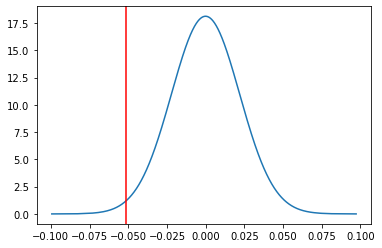

In [180]:
x = sorted(np.concatenate(sim_returns))
plt.plot(x, norm.pdf(x,np.mean(x),np.std(x)) )
plt.axvline(var_99, color = 'r')
plt.show()